## Project conducted by R.P.M. Kras
### Personal development project

Source: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

Used in accordance to the Attribution 4.0 International license.

### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Heart Attack.csv')
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


### Data preparation

In [4]:
le = LabelEncoder()
le.fit(data['class'])
data['class'] = le.transform(data['class'])

data.corr()['class']

age              0.238097
gender           0.094432
impluse          0.006920
pressurehight   -0.020825
pressurelow     -0.009659
glucose         -0.033059
kcm              0.217720
troponin         0.229376
class            1.000000
Name: class, dtype: float64

### Data analysis

<Axes: ylabel='Frequency'>

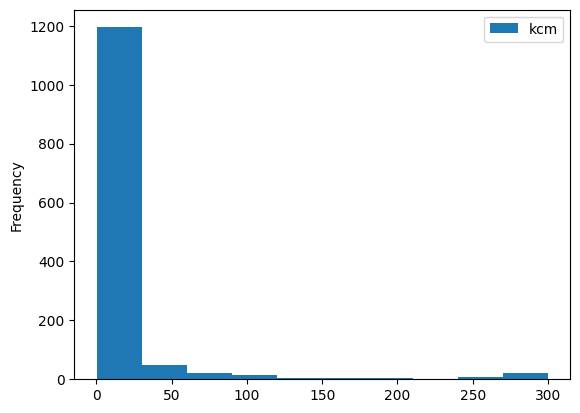

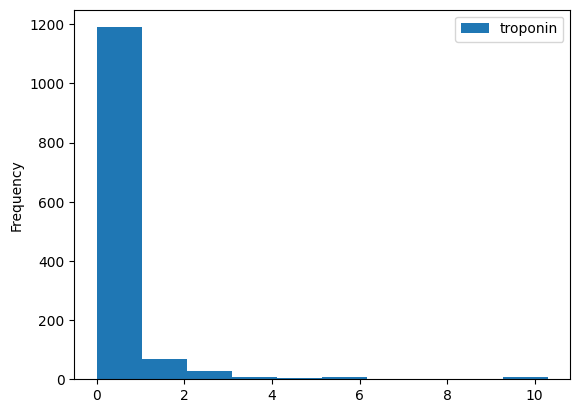

In [16]:
data.plot.hist(y="kcm")
data.plot.hist(y="troponin")

### Training the model

In [6]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [8]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, y_pred)
error

0.3446969696969697

In [10]:
data.describe()['class']

count    1319.000000
mean        0.614102
std         0.486991
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

Writer's note: the error is below the STD indicating relative good performance.

In [11]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [12]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [13]:
print("Accuracy is ", accuracy)
print("F1-score is ", f1)
print("Recall is ", recall)
print("Precision is ", precision)

Accuracy is  0.6553030303030303
F1-score is  0.7707808564231738
Recall is  0.9683544303797469
Precision is  0.6401673640167364


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

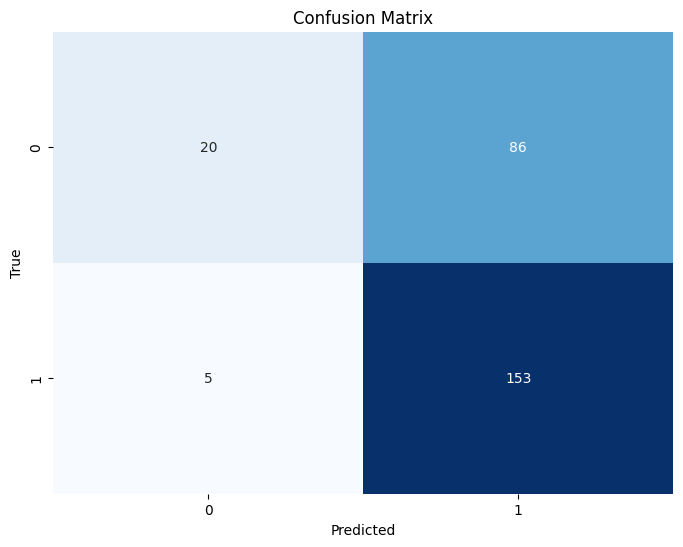

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

From the common performance metrics as well as the confusion matrix we can state that the overall performance of the support vector machine model on this heart disease dataset is good. Considering the context, however, which is to classify patients with heart disease correctly, from the results of the confusion matrix it becomes clear that the number of false positives is relatively low. This further supports the claim that the model its performance is good. Through the results it also becomes clear that the model reaches a lot of false positive cases. This will lead to more work for hospital staff, nurses and doctors. The model appears to have trouble with correctly identifying patients that do not have heart disease. Consequently, further research is warranted to explore this fault and to enhance the model its reliability and robustness.